<a href="https://colab.research.google.com/github/Lazar186/Borisovik/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [ ]:
! pip install pandas scikit-learn seaborn scipy

In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Загрузка данных
df = pd.read_csv('/content/heart_disease.csv')  # Убедитесь, что путь к файлу корректен

# Переименуем столбцы для удобства работы (удаляем лишние пробелы)
df.columns = df.columns.str.strip()

# x_binary - признаки, y_binary - целевая переменная для бинарной классификации
y_binary = df['Disease']  # Целевая переменная
x_binary = df.drop(['Disease'], axis=1)  # Исключаем целевую переменную из признаков

# Функция для кросс-валидации и отчета по классификации
def cross_validate_and_report(x, y):
    # Применяем SMOTE для oversampling (балансировка классов)
    smote = SMOTE(random_state=42)
    x_res, y_res = smote.fit_resample(x, y)

    # Используем Stratified K-Fold для кросс-валидации
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = DecisionTreeClassifier(random_state=42)

    # Получаем точность по кросс-валидации
    cv_scores = cross_val_score(model, x_res, y_res, cv=cv, scoring='accuracy')

    # Выводим точность
    print(f'Accuracy with SMOTE: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

    # Обучаем модель на всём сбалансированном наборе данных
    model.fit(x_res, y_res)
    y_pred = model.predict(x_res)

    # Печатаем отчет по классификации
    print("\nClassification Report:")
    print(classification_report(y_res, y_pred))

# Кросс-валидация и отчет для бинарной классификации
print("Binary Classification Results:")
cross_validate_and_report(x_binary, y_binary)


Binary Classification Results:
Accuracy with SMOTE: 0.7700 ± 0.0591

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Преобразование категориальных переменных остается без изменений

In [22]:
# Создаем копию данных
X = x_binary.copy()  # x_binary — признаки для бинарной классификации

# Определяем категориальные столбцы (object или строки)
category_columns = X.select_dtypes(include=['object']).columns  # Собираем колонки типа object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию
X = pd.get_dummies(X, columns=category_columns, drop_first=True)

# Выводим результат для проверки
print("One-Hot Encoded DataFrame:")
print(X.head())


One-Hot Encoded DataFrame:
   age  sex  chest pain type  resting blood pressure  \
0   70    1                4                     130   
1   67    0                3                     115   
2   57    1                2                     124   
3   64    1                4                     128   
4   74    0                2                     120   

   serum cholestoral in mg/dl  fasting blood sugar > 120 mg/dl  \
0                         322                                0   
1                         564                                0   
2                         261                                0   
3                         263                                0   
4                         269                                0   

   resting electrocardiographic results  maximum heart rate achieved  \
0                                     2                          109   
1                                     2                          160   
2                      

In [23]:
X

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [24]:
# Создаем копию данных
df_corr_test = X.copy()  # X — это признаки после обработки (например, после One-Hot Encoding)

# Добавляем целевую переменную в копию данных
df_corr_test['Disease'] = y_binary  # y_binary — это целевая переменная

# Выводим первые строки для проверки
print(df_corr_test.head())


   age  sex  chest pain type  resting blood pressure  \
0   70    1                4                     130   
1   67    0                3                     115   
2   57    1                2                     124   
3   64    1                4                     128   
4   74    0                2                     120   

   serum cholestoral in mg/dl  fasting blood sugar > 120 mg/dl  \
0                         322                                0   
1                         564                                0   
2                         261                                0   
3                         263                                0   
4                         269                                0   

   resting electrocardiographic results  maximum heart rate achieved  \
0                                     2                          109   
1                                     2                          160   
2                                     0           

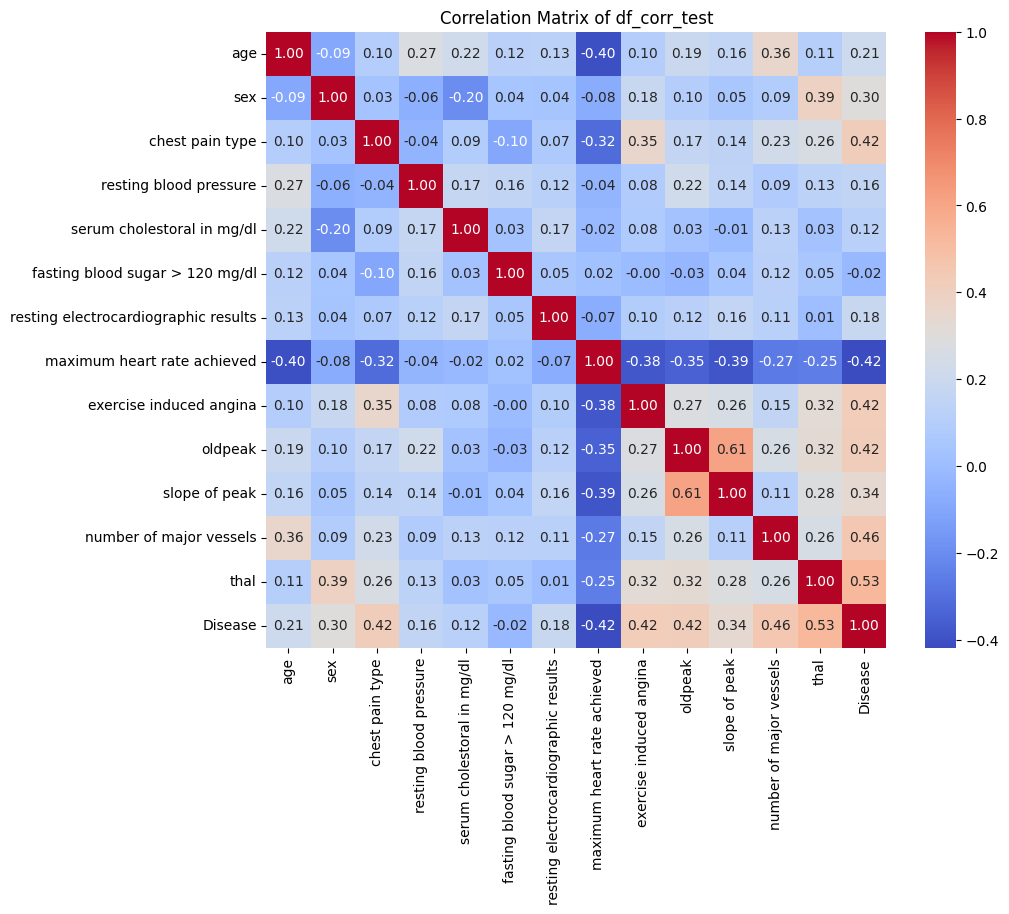

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загрузка данных
df = pd.read_csv('heart_disease.csv')

# Удаляем лишние пробелы в названиях столбцов
df.columns = df.columns.str.strip()

# Создание переменной 'is_critical_condition' на основе условий
df['is_critical_condition'] = np.where(
    (df['resting blood pressure'] > 140) |
    (df['maximum heart rate achieved'] < 100) |
    (df['exercise induced angina'] == 1) |
    (df['serum cholestoral in mg/dl'] > 240) |
    (df['oldpeak'] > 2.5),
    1,  # Критическое состояние
    0   # Состояние некритическое
).astype(int)

# Проверка первых строк для отладки
print(df[['resting blood pressure',
          'maximum heart rate achieved',
          'exercise induced angina',
          'serum cholestoral in mg/dl',
          'oldpeak',
          'is_critical_condition']].head())

# Функция для выполнения регрессии с учетом регуляризации
def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """

    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()  # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge()  # L2-регуляризация (Ridge)
    else:
        model = LinearRegression()  # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)   # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)              # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

# Целевая переменная для медицинских данных
y = df['is_critical_condition']  # Целевая переменная для регрессии

# Признаки, которые будем использовать для регрессии
X = df[['age', 'resting blood pressure', 'serum cholestoral in mg/dl']]  # Выбор признаков

# Вызов функции для регрессии с медицинскими данными (пример с L1-регуляризацией)
model, X_train, X_test, y_train, y_test = resolve_regression(X, y, regularization='l1')


   resting blood pressure  maximum heart rate achieved  \
0                     130                          109   
1                     115                          160   
2                     124                          141   
3                     128                          105   
4                     120                          121   

   exercise induced angina  serum cholestoral in mg/dl  oldpeak  \
0                        0                         322      2.4   
1                        0                         564      1.6   
2                        0                         261      0.3   
3                        1                         263      0.2   
4                        1                         269      0.2   

   is_critical_condition  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
Regularization: l1
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.13
R^2 

Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [27]:
X

,age,resting blood pressure,serum cholestoral in mg/dl
0,70,130,322
1,67,115,564
2,57,124,261
3,64,128,263
4,74,120,269
...,...,...,...
265,52,172,199
266,44,120,263
267,56,140,294
268,57,140,192


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         270 non-null    int64
 1   resting blood pressure      270 non-null    int64
 2   serum cholestoral in mg/dl  270 non-null    int64
dtypes: int64(3)
memory usage: 6.5 KB


Отбор признаков по корреляции

In [29]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [31]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=3. There will be no feature selection and all features will be kept.
  warnings.warn(


In [32]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.14
R^2 Score: 0.32


In [33]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.14
R^2 Score: 0.32


Regularization: None
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.14
R^2 Score: 0.32


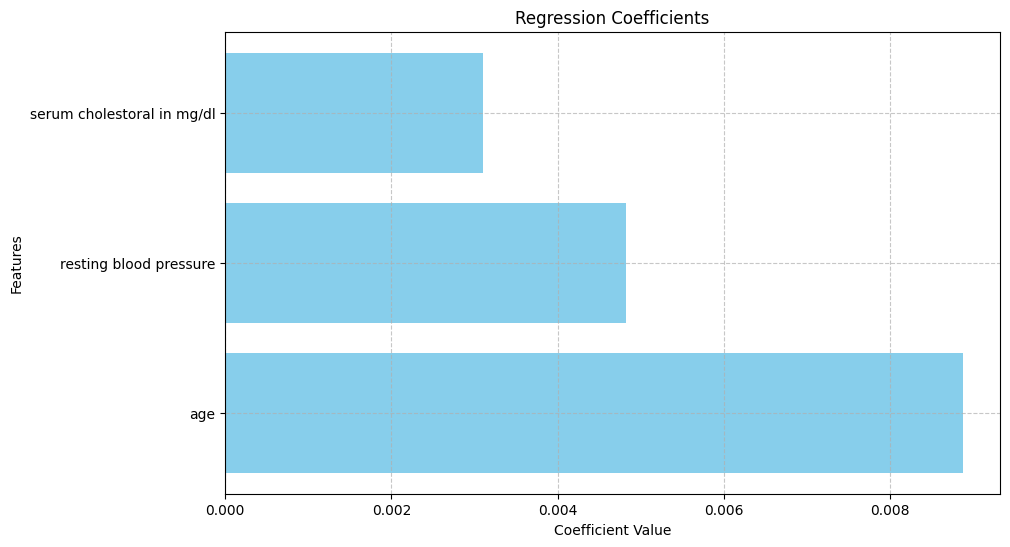

In [34]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Выбираем числовые признаки
# Добавляем float и int, поскольку в медицинских данных могут быть числовые признаки с обоими типами
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Проверка, если числовые признаки найдены
if not numeric_features:
    print("Нет числовых признаков для нормализации.")
else:
    # Инициализируем MinMaxScaler
    scaler = MinMaxScaler()

    # Применяем нормализацию
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

    # Вывод для проверки первых строк после нормализации
    print("Признаки после нормализации:")
    print(X[numeric_features].head())


Признаки после нормализации:
        age  resting blood pressure  serum cholestoral in mg/dl
0  0.854167                0.339623                    0.447489
1  0.791667                0.198113                    1.000000
2  0.583333                0.283019                    0.308219
3  0.729167                0.320755                    0.312785
4  0.937500                0.245283                    0.326484


<ipython-input-36-46e30cbc74c7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [37]:
X_selected_rfe

,age,resting blood pressure,serum cholestoral in mg/dl
0,70,130,322
1,67,115,564
2,57,124,261
3,64,128,263
4,74,120,269
...,...,...,...
265,52,172,199
266,44,120,263
267,56,140,294
268,57,140,192


Regularization: None
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.14
R^2 Score: 0.32


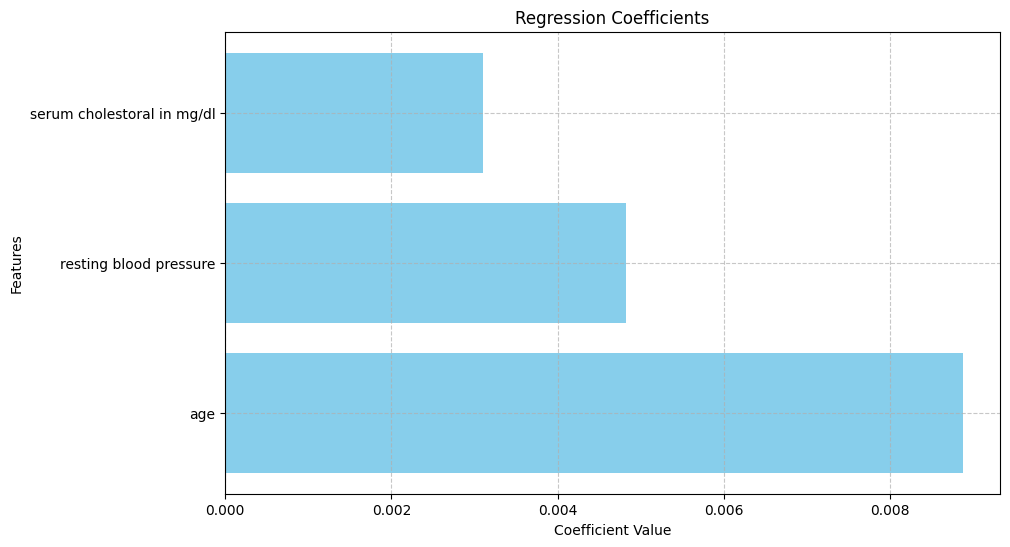

In [38]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [39]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.14
R^2 Score: 0.32


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [40]:
X

,age,resting blood pressure,serum cholestoral in mg/dl
0,0.854167,0.339623,0.447489
1,0.791667,0.198113,1.000000
2,0.583333,0.283019,0.308219
3,0.729167,0.320755,0.312785
4,0.937500,0.245283,0.326484
...,...,...,...
265,0.479167,0.735849,0.166667
266,0.312500,0.245283,0.312785
267,0.562500,0.433962,0.383562
268,0.583333,0.433962,0.150685


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.20
R^2 Score: -0.00


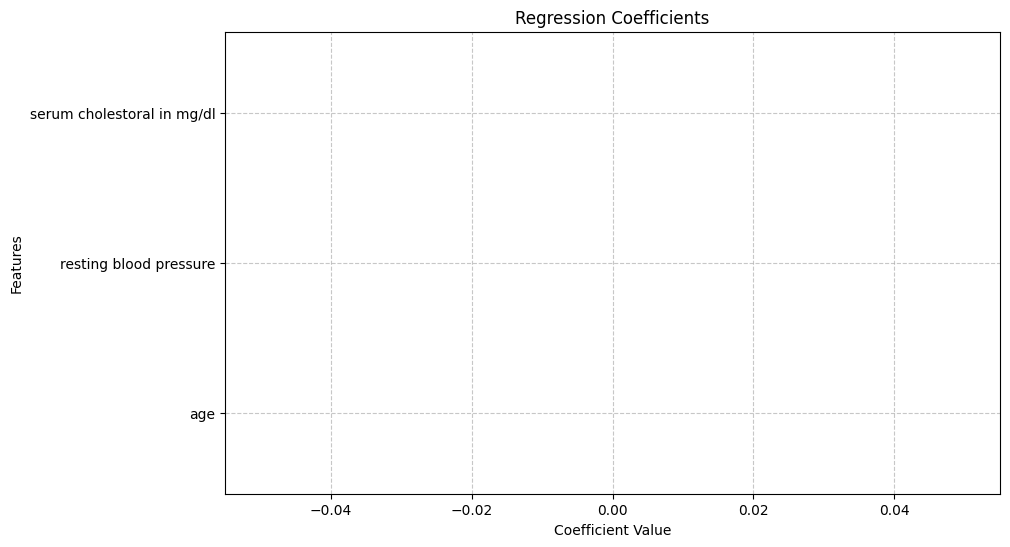

In [41]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 0.15
R^2 Score: 0.28


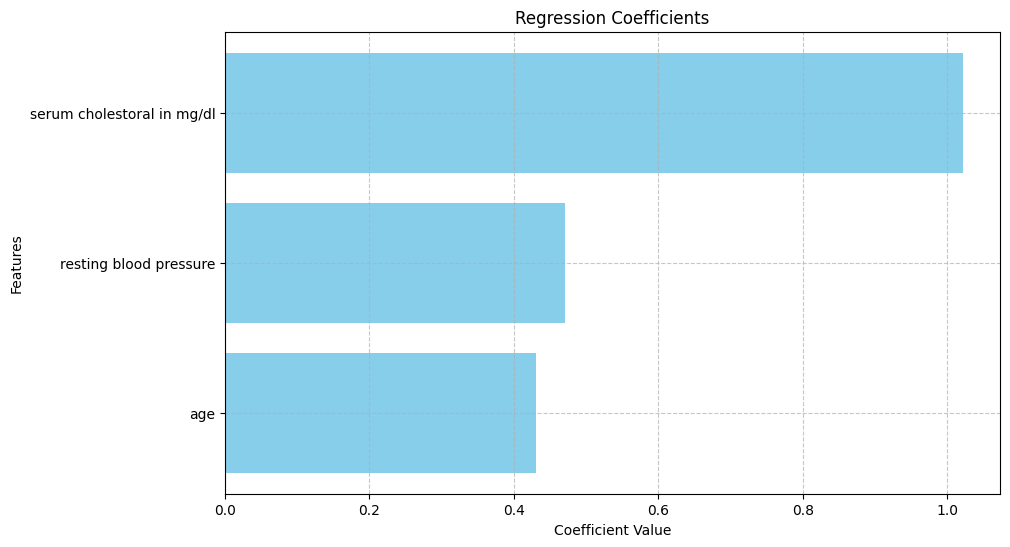

In [42]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.14
R^2 Score: 0.32


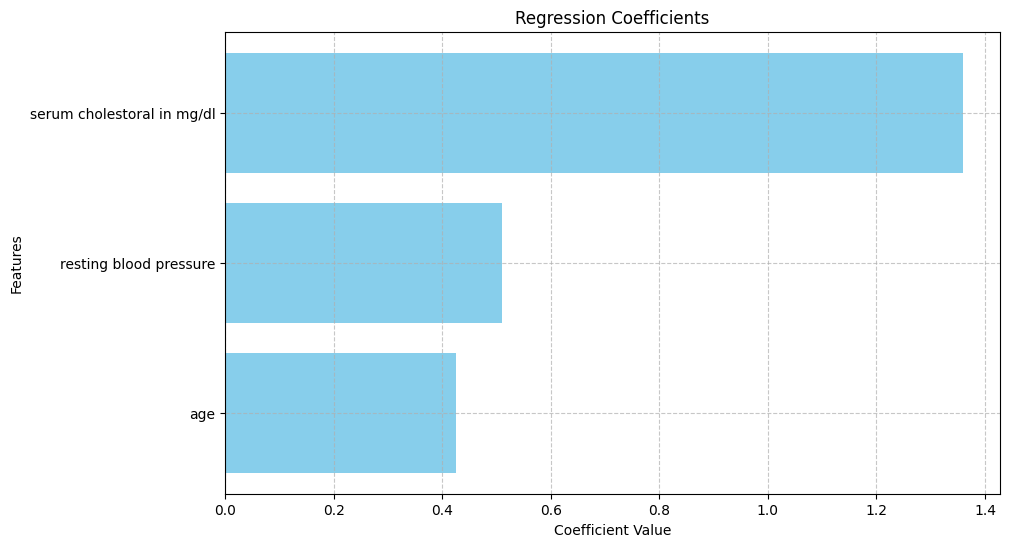

In [43]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)
